<br>
<br>
 <center> <font size = "5">Client Post Request  </font></center>
 <br>
 <center> <font size = "4"> API Functions
 </font></center>
 <br>
 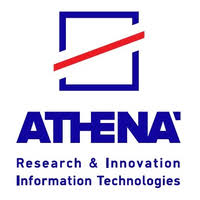
<br>
<br>

---

### Imports

In [ ]:
import json
import pandas as pd
from datetime import datetime
from bokeh.plotting import figure, show
from bokeh.layouts import layout
from bokeh.io import output_notebook
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import numpy as np
from itertools import combinations
import requests
import logging
from random import random
import seaborn as sn

<br>

### Forecast Simple Example with custom time series (String data)

In [ ]:
url = 'http://H O S T/time_series/forecast'

payload = dict(start=8, end=14, forecast_range=2, period=[2,3,4,6,8,12,16], data = ['2','4','6','8','10','12','14','16','18','20','22','24','26','28','30'],locale = 'None',api_key='XXXX')
data = payload

res = requests.post(url, json = data)
print(res.text)

<br>

### Decompose with custom time series (String data)

In [ ]:
url = 'http://H O S T/time_series/decompose'

payload = dict(data = ['2','4','6','8','10','12','14','16','18','20','22','24','26','28'],model = 'multiplicative', period = 2,locale = 'None',api_key = "XXXX")
data = payload

res = requests.post(url, json = data)
print(res.text)

<br>

### Forecast Simple Example with custom time series (float data)

In [ ]:
url = 'http://H O S T/time_series/forecast'

payload = dict(start=8, end=9, forecast_range = 3, period = [2],data = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],locale = 'None',api_key="XXXX")
data = payload

res = requests.post(url, json = data)
print(res.text)

<br>

### Forecast Simple Example with custom time series (String data (German locale))

In [ ]:
url = 'http://H O S T/time_series/forecast'

payload = dict(start=8, end=9, forecast_range = 3, period = [2], data = ['2,1','4,2','6,1','8,2','10,1','12,1','14,2','16,1','18,2','20,1','22,2','24,1','26,2','28,1','30,2'],locale = 'de_DE.utf8',api_key="XXXX")
data = payload

res = requests.post(url, json = data)
print(res.text)

<br>

### Example Catalog

In [ ]:
url = 'http://H O S T/time_series/catalog'

res = requests.get(url)
print(res.text)

In [ ]:
url = 'http://H O S T/time_series/forecast'

payload = dict(start=100, end=106, forecast_range = 2, period = [256,7,14,2,4,300], data = 'EU- Corn Future_0011B1.txt',locale = 'None',api_key="XXXX")
data = payload

res = requests.post(url, json = data)
print(res.text)

<br>

### API 'correlate()' call example using custom data

In [ ]:
# Create Data
# -----------
time_series_1 = [i*2 for i in range(1,31)]
time_series_2 = [i*3 for i in range(1,31)]
time_series_3 = [random() for i in range(1,31)]

data = [time_series_1,time_series_2,time_series_3]


# API call
# -------
url = 'http://H O S T/time_series/correlate'

payload = dict(data=data, start=0, window_size=3, step_size=3 ,steps=3 ,correlation_method='pearson', locale='None',api_key="XXXX")
data = payload

res = requests.post(url, json = data)


# Results Visualisation
# --------------------
data = res.json()

data = data['correlations']

for i in range(0,len(data)):
    pd.DataFrame(data[i])
    sn.heatmap(pd.DataFrame(data[i],columns=['A','B','C']), annot=True)
    plt.show()

### API 'correlate()' call example using sftp data

In [ ]:
# Call catalog to see the available data on the sftp
# --------------------------------------------------

url = 'http://H O S T/time_series/catalog'

res = requests.get(url)
print(res.text)

In [ ]:
# Select data
# -----------

data = ["EU- Corn Future_0011B1.txt", "EU- Milling Wheat Future_0011B2.txt","GB- Robusta Coffee Fut. (409)_001071.txt"]


# API call
# -------
url = 'http://H O S T/time_series/correlate'

payload = dict(data=data, start=0, window_size=3, step_size=100 ,steps=3 ,correlation_method='pearson', locale='None',api_key = 'XXXX')
data = payload

res = requests.post(url, json = data)


# Results Visualisation
# --------------------
data = res.json()

data = data['correlations']

for i in range(0,len(data)):
    pd.DataFrame(data[i])
    sn.heatmap(pd.DataFrame(data[i],columns=['A','B','C']), annot=True)
    plt.show()